# Optimisation problem 1
## Truss optimisation of a simple 2D problem
The following example is intended to serve as an introduction to optimisation using Python. The script can be easily generelised to treat any type of 2D truss. The truss we study comprise two bars clamped at the left hand-side and excited with a static point force at its' tip.


![](2dTruss.png)

We assume the following constants
* Angle between bars : $\alpha = 30^o$

* Length of each bar : $L_1 = L_2 = 1$ [m]

* Yield stress : $\sigma_0 = 1$ [Pa]

* Mass density : $\rho = 1$ [kg/m$^3$]

* Tip force : $F = 1$ [N]

The maximum weight of the truss should be minimised whilst maintaining stress constraint $|\sigma_i| \leq \sigma_0$ for $i = 1, 2$ and the maximum tip displacement $\delta \leq \delta_0$.

The optimisation problem can be formulated through an objective function $g_0$ that describes the problem to be minimised, in the following case it is a function of two areas to be chosen appropriately whilst maintaning the stress constraints $g_1, g_2$ and the displacement (strain) constraint $g_3$:


\begin{equation}
\mathcal{P}
    \begin{cases}
    min\ A_1, A_2\quad
    g_0 = m(A_1, A_2) = \rho L \left( \frac{2}{\sqrt{3}} A_1 + A_2  \right)\\
    \mathrm{subject\ to}
        \begin{cases}
            g_1 = \frac{2F}{A_1} \leq \sigma_0\\
            g_2 = \frac{\sqrt{3}F}{A_2} \leq \sigma_0\\
            g_3 = \frac{8}{\sqrt{3}A_1} + \frac{3}{A_2} \leq \frac{\sigma_0}{F}
        \end{cases}
    \end{cases}
\end{equation}

In [176]:
import numpy as np
from math import sqrt
from scipy import optimize
import matplotlib.pyplot as plt

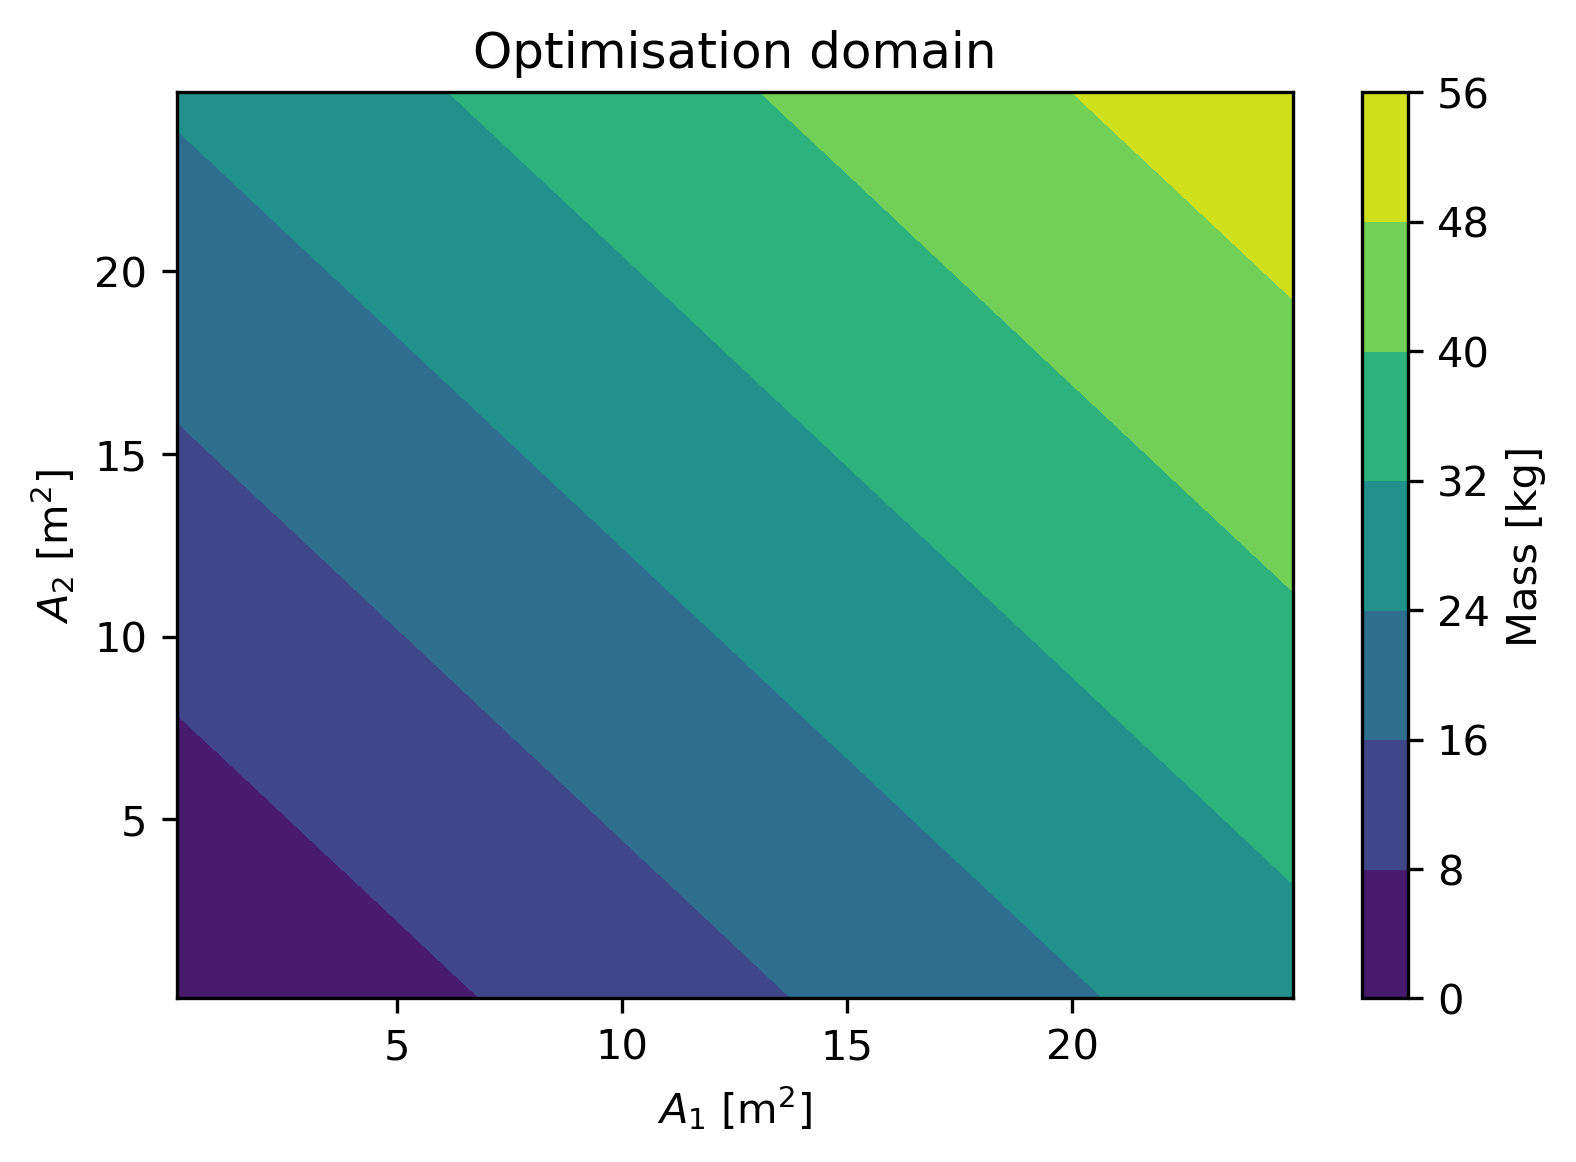

In [203]:
# Define the objective function and its' constraints

def g_0(x):
    rho = 1
    L = 1
    A_1, A_2 = x
    g_0 = rho*L * (2/sqrt(3) * A_1 + A_2)
    return g_0

def g_1(x):
    F = 1
    sigma_0 = 1
    A_1 = x
    g_1 = sigma_0 - (2*F/A_1)
    return g_1

def g_2(x):
    F = 1
    sigma_0 = 1
    A_2 = x
    g_2 = sigma_0 - ((sqrt(3)*F)/A_2)
    return g_2

def g_3(x):
    F = 1
    sigma_0 = 1
    A_1,A_2 = x
    g_3 = (sigma_0/F) - (8/(sqrt(3)*A_1) + (3/A_2))
    return g_3

# Generate areas to visualise the Optimisation domain

A_1 = A_2 = np.arange(0.1,25,0.1)
x1, x2 = np.meshgrid(A_1, A_2)  # Use x1 and x2 for the areas and generate vectors

mass = g_0([x1,x2]) # Call the objective function to generate the mass

plt.figure(dpi =300)
plt.contourf(x1,x2,mass)
plt.colorbar(label = 'Mass [kg]')
plt.xlabel('$A_1$ [m$^2$]')
plt.ylabel('$A_2$ [m$^2$]')
plt.title('Optimisation domain')
plt.show()

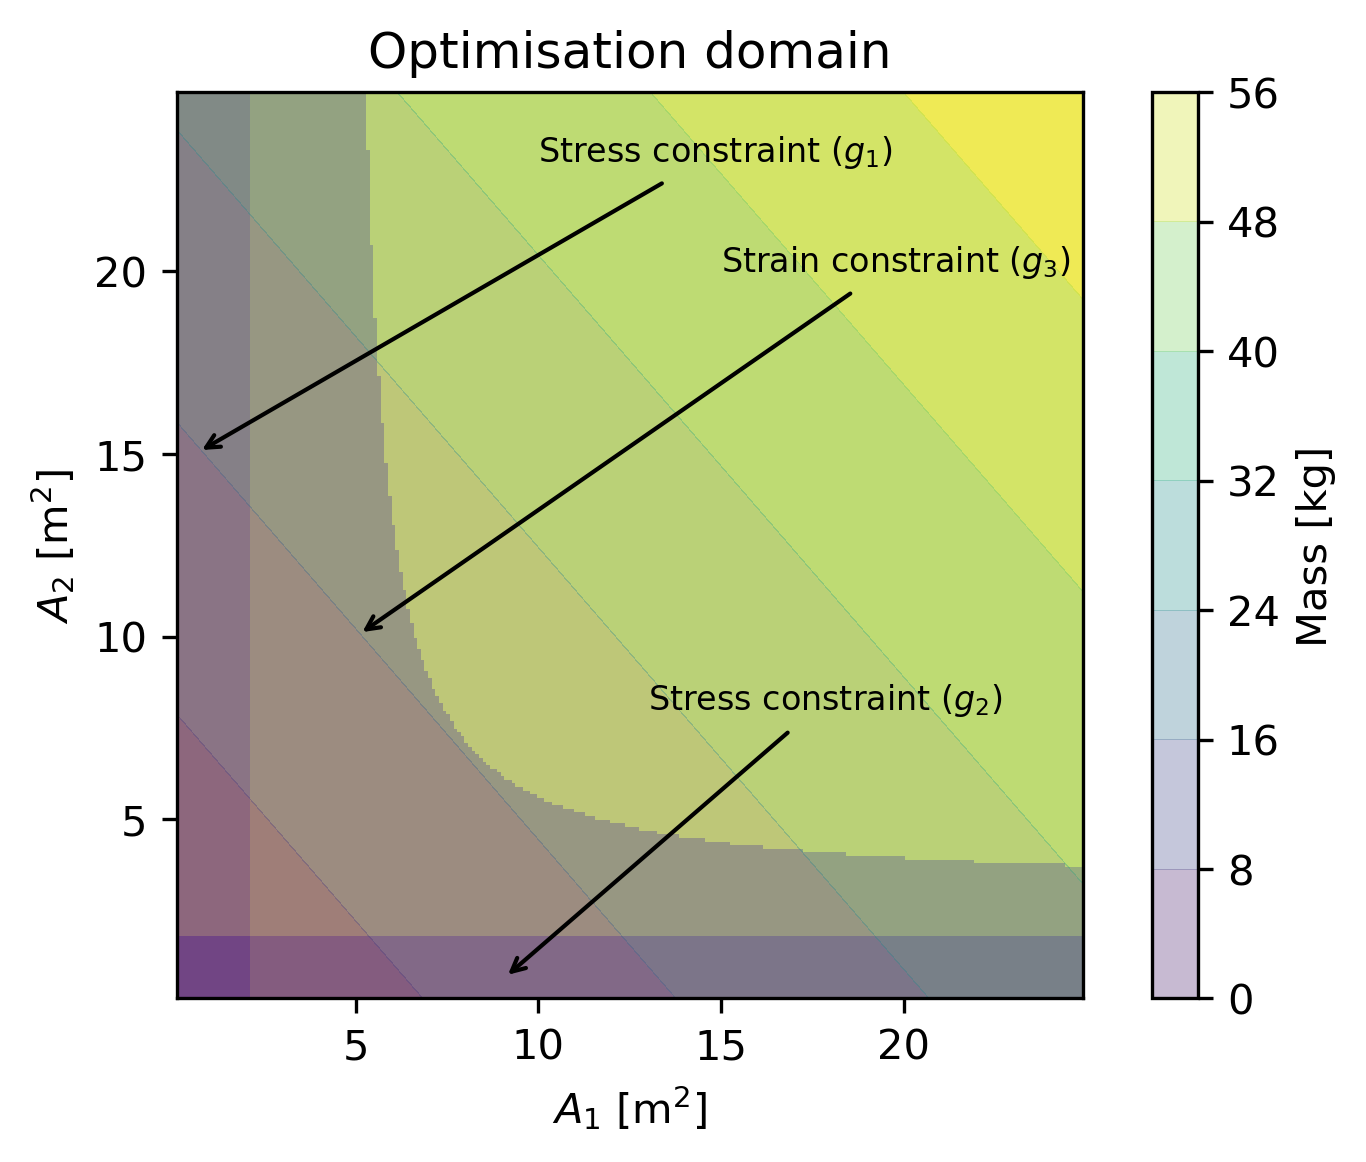

In [205]:
# Let's visualise the constraints on top of the Optimisation domain

# Plot the domain
plt.figure(dpi =300)
plt.contourf(x1,x2,mass, alpha = 0.3)
plt.colorbar(label = 'Mass [kg]')
plt.xlabel('$A_1$ [m$^2$]')
plt.ylabel('$A_2$ [m$^2$]')
plt.title('Optimisation domain')

# Exaluate constraints 1,2,3
g1 = g_1(x1)
g2 = g_2(x2)
g3 = g_3([x1, x2])

# g>0, Note that area is a positive quantity
plt.imshow(g1>0, extent = (x1.min(), x1.max(), x2.min(), x2.max()), alpha = 0.3, origin = 'lower')
plt.imshow(g2>0, extent = (x1.min(), x1.max(), x2.min(), x2.max()), alpha = 0.3, origin = 'lower')
plt.imshow(g3>0, extent = (x1.min(), x1.max(), x2.min(), x2.max()), alpha = 0.3, origin = 'lower')

# Information
plt.annotate("Stress constraint ($g_1$)",
            xy=(0.6, 15), xycoords='data',
            xytext=(10, 23), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), fontsize = 8
            )
plt.annotate("Stress constraint ($g_2$)",
            xy=(9, 0.6), xycoords='data',
            xytext=(13, 8), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), fontsize = 8
            )
plt.annotate("Strain constraint ($g_3$)",
            xy=(5, 10), xycoords='data',
            xytext=(15, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), fontsize = 8
            )

# The dark areas are the non-admisible domain, whilst the light area is
# admisible, We are lookig for areas A_1, A_2 (a point with coordinates x,y)
# that does not coincide with the constraints (forbitten area)

# Already here we can see what point could potentially be optimal
plt.show()

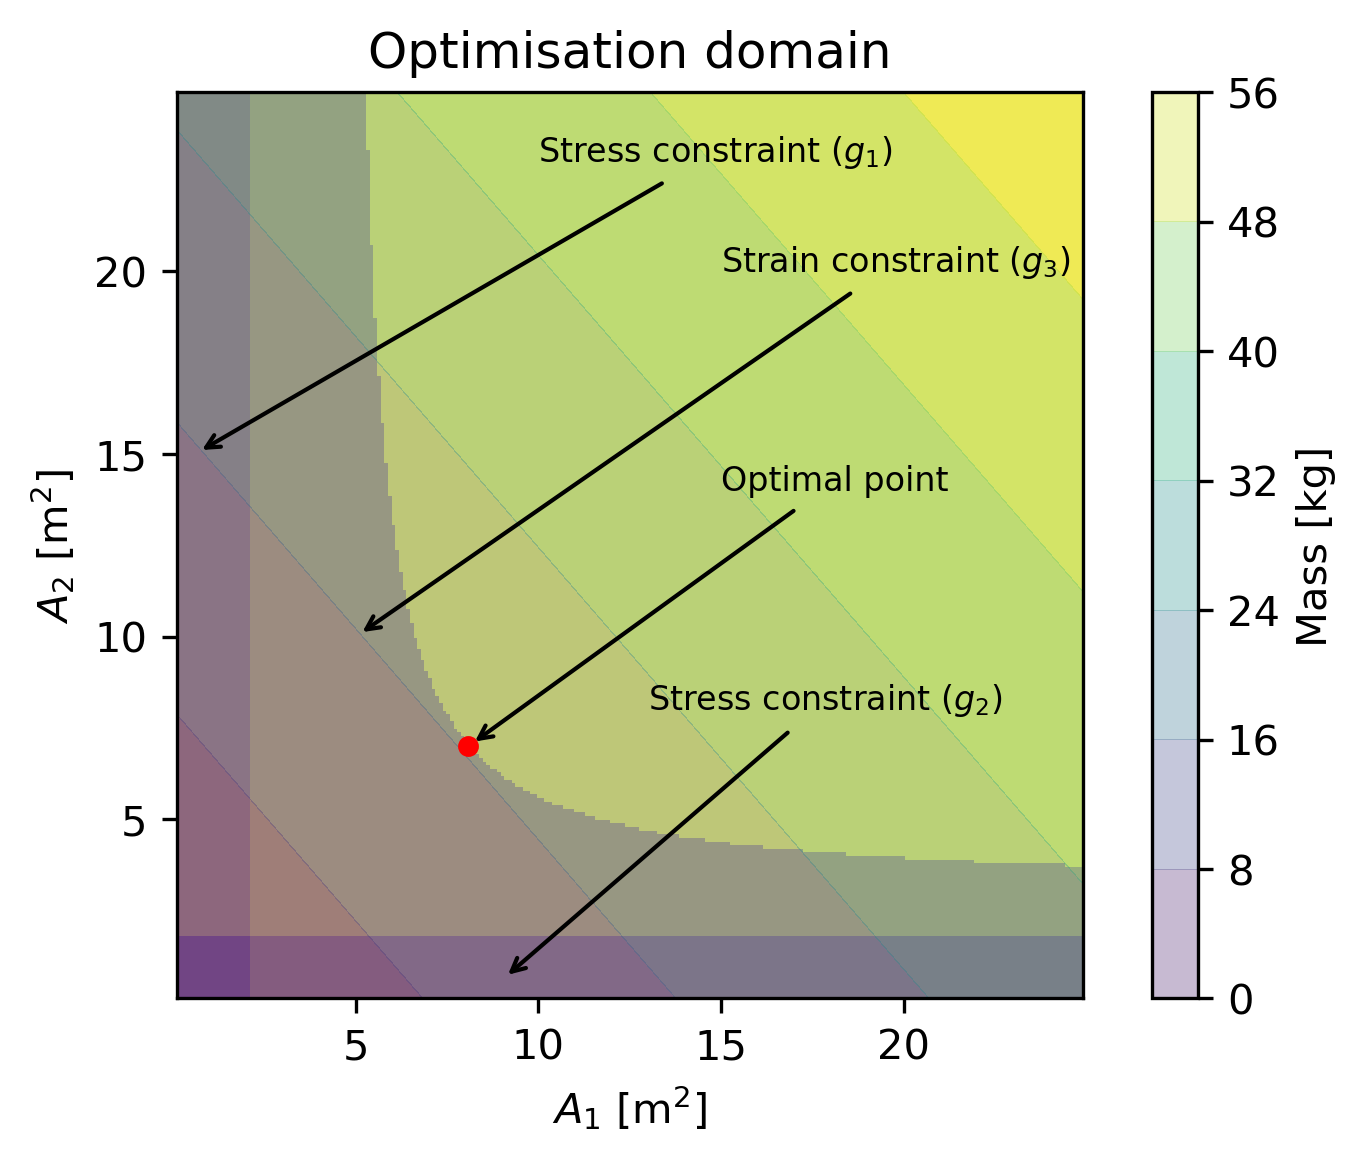

In [206]:
# Solve the optimisation problem using Scipy, defined the constraints

# type : Inequality, function : g_i

g = [{'type' : 'ineq', 'fun': g_1},
     {'type' : 'ineq', 'fun': g_2},
     {'type' : 'ineq', 'fun': g_3}
    ]
# send in objective function and initial guesses
sol = optimize.minimize(g_0,(10,21), constraints = g)
x1_star = abs(sol.x[0])
x2_star = abs(sol.x[1])

# visualise

# Plot the domain
plt.figure(dpi =300)
plt.contourf(x1,x2,mass, alpha = 0.3)
plt.colorbar(label = 'Mass [kg]')
plt.xlabel('$A_1$ [m$^2$]')
plt.ylabel('$A_2$ [m$^2$]')
plt.title('Optimisation domain')

# Exaluate constraints 1,2,3
g1 = g_1(x1)
g2 = g_2(x2)
g3 = g_3([x1, x2])

# --- g>0, Note that area is a positive quantity
plt.imshow(g1>0, extent = (x1.min(), x1.max(), x2.min(), x2.max()), alpha = 0.3, origin = 'lower')
plt.imshow(g2>0, extent = (x1.min(), x1.max(), x2.min(), x2.max()), alpha = 0.3, origin = 'lower')
plt.imshow(g3>0, extent = (x1.min(), x1.max(), x2.min(), x2.max()), alpha = 0.3, origin = 'lower')

# --- Optimal point
plt.plot(x1_star,x2_star,'or', markersize = 4)


# Information
plt.annotate("Stress constraint ($g_1$)",
            xy=(0.6, 15), xycoords='data',
            xytext=(10, 23), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), fontsize = 8
            )
plt.annotate("Stress constraint ($g_2$)",
            xy=(9, 0.6), xycoords='data',
            xytext=(13, 8), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), fontsize = 8
            )
plt.annotate("Strain constraint ($g_3$)",
            xy=(5, 10), xycoords='data',
            xytext=(15, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), fontsize = 8
            )
plt.annotate("Optimal point",
            xy=(x1_star, x2_star), xycoords='data',
            xytext=(15, 14), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), fontsize = 8
            )
plt.show()